# 📊 Evaluasi Model IndoBERT terhadap Data Tahun 2025
Notebook ini mengevaluasi performa model IndoBERT hasil pelatihan tahun 2023 terhadap data berita baru tahun 2025.

In [ ]:
# Import library
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load model dan tokenizer
model_path = '../models/indobert-fold0/checkpoint-3800'
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [5]:
# Load data 2025
df = pd.read_csv('../cleandata/hoax_dataset_2025.csv').dropna(subset=['cleaned', 'label'])
texts = df['cleaned'].tolist()
labels = df['label'].tolist()

In [6]:
# Tokenisasi dan prediksi
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt', max_length=256)
with torch.no_grad():
    outputs = model(**inputs)
    probs = torch.softmax(outputs.logits, dim=1)
    preds = torch.argmax(probs, dim=1).numpy()

In [7]:
# Classification report
report = classification_report(labels, preds, target_names=['Valid', 'Hoax'])
print(report)

              precision    recall  f1-score   support

       Valid       0.95      0.92      0.93       203
        Hoax       0.94      0.97      0.95       261

    accuracy                           0.94       464
   macro avg       0.95      0.94      0.94       464
weighted avg       0.94      0.94      0.94       464



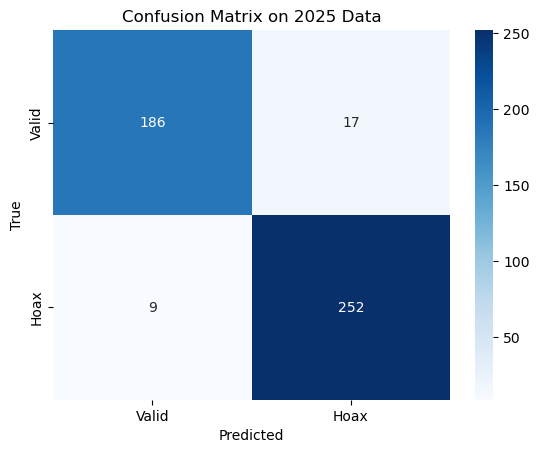

In [8]:
# Confusion matrix
cm = confusion_matrix(labels, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Valid', 'Hoax'], yticklabels=['Valid', 'Hoax'])
plt.title('Confusion Matrix on 2025 Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()